# Lecture notes from the fourth week¶
Programming for the Behavioral Sciences

A large part of running behavioural experiments concerns the preparation of stimuli, i.e., what you have your participants looking at. The goal of this week is to create stimuli for a visual search experiment where participants search for a target object among distractors (non-targets that distract you from finding the target). We want to create a stimulus image where we flexibly can control the background color of the image as well as the the color, shape, and size of the target and distractors. An example stimuli is shown here; the red triangle is the target and the blue dots are the distractors:

<img src="img\stimulus.png" alt="Stimulus" style="width:304px;height:228px;">

This week, we will use Matplotlib to generate the images. Next week PsychoPy will be used to accomplish the same task. The rest of the lectures in this course will be devoted to implement central parts of the experimental process in a visual search experiment: create stimuli, record data, and plot and analyze data.

### Introduction to this week's exercise
So what do we need to know before we can start building the stimuli?

- Information about the background (size, color)
- Information about the target (position, shape, color)
- Information about the distractors (positions, shape, color)

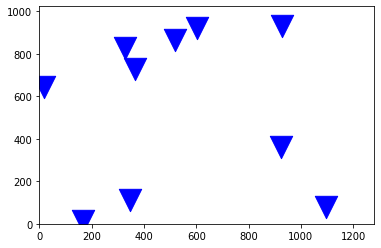

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A first attempt (we ignore the target for now)
image_size = (1280, 1024)  # Size of background in pixels
nDistractors = 10  # Number of distractors
distractor_size = 500

# Generate positions where to put the distractors
xr = np.random.randint(0, image_size[0], nDistractors)
yr = np.random.randint(0, image_size[1], nDistractors)

plt.scatter(xr, yr, s=distractor_size ,c='b',marker='v')
plt.axis([0, image_size[0], 0, image_size[1]])
plt.show()

Two problem are visible
 * The distractors overlap
 * Parts of a distractor can be outside of the plot
 
One way to solve this is ensure that the distractors are always separated by a large enough distance to other distractors and to the image border.

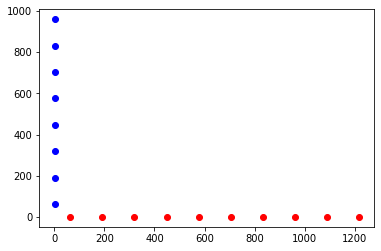

In [2]:
# Divide the plot into a 10 x 8 grid, and allow only one distractor in each grid
image_size = [1280, 1024]
grid_size = [10, 8]

grid_size_pixels_x  = image_size[0] / grid_size[0]
grid_size_pixels_y  = image_size[1] / grid_size[1]
x_c = np.arange(grid_size_pixels_x / 2.0, image_size[0], grid_size_pixels_x)
y_c = np.arange(grid_size_pixels_y / 2.0, image_size[1], grid_size_pixels_y)

# Plot the positions of the new grid
xx = np.ones(len(x_c))
yy = np.ones(len(y_c))
plt.plot(x_c, xx, 'ro')
plt.plot(yy, y_c, 'bo')
# plt.axis([0, image_size[0], 0, image_size[1]])
plt.show()


New problem. Seems like only the x-, and y-, coordinates of the grid elements were defined, but not the locations for ALL grid elements. How can this be done?

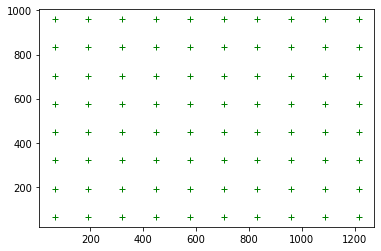

In [3]:
# Meshgrid creats the whole grid (you could also use a double for-)
x_all, y_all = np.meshgrid(x_c, y_c)

# Reshape the positions into a N x 2 array (N rows, 2 columns), to make it easier to work with later
xy_all = np.vstack((x_all.flatten(), y_all.flatten())).T

# Plot all grid elements
plt.figure()
plt.plot(xy_all[:, 0], xy_all[:, 1], 'g+')
plt.show()

Now we know where distractors can be placed. But we don't want to put a distractor at each grid position, but draw a number of them (say 10) at random. One way to do this is the 'shuffle' the array, and then select the 10 first elements.

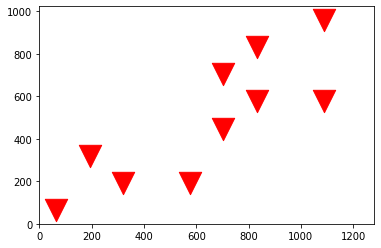

In [4]:
import time # Used to animate below
nSelect = 10

# Randomly change the positions of the locations in the array
np.random.shuffle(xy_all)

# Plot the result (looks much better!)
plt.scatter(xy_all[:nSelect, 0], xy_all[:nSelect, 1], s=distractor_size ,c='r',marker='v')
plt.axis([0, image_size[0], 0, image_size[1]])
plt.show()

### Dictionaries
In the assigment, dictionaries will be used as containers of information about the background, target, and distractors. A dictionary is just like it sounds; given a key (-word), it returns whatever is behind the door the key opens (a number, string, or any other python object). 

In [5]:
# Example of how dictionaries are defined...
d1 = {'key1': 4, 'key2': 'my_value2'}

#... and how the values are accessed from them
print(d1['key2'])

# Unlike lists and arrays, variables in dictionaries are not ordered, so you can't do, e.g., 
# print(d1[0])

my_value2


In this assignment, the dictionaries contain information about the visual search images

In [6]:
# Specify the size and color of the background. Use a dictionary
background = {'size':np.array([1280, 1024]),'color':0.5} # zero - black, 1 - white

# Specify the target
target = {'shape':'^', 'size':10, 'color':'r', 'face_color':'r'}

# Specify the distractors
distractor = {'shape':'o', 'size':10, 'color':'b', 'number_of':10}

# Test prints
print(background['color'], distractor['size'])

0.5 10
